## Descriptors-based regression

## 1. Using SIFT descriptors

<p style="font-family: calibri; font-size: 14px;">
References: <br>
https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_sift.html
</p>

In [6]:
import matplotlib.pyplot as plt

from skimage import data, transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

import cv2
import numpy as np

In [2]:
img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

In [3]:
print(type(img1))

<class 'numpy.ndarray'>


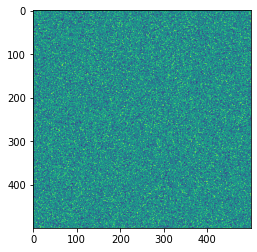

In [8]:
img3 = np.random.random(size=(500, 500))
plt.imshow(img3)
plt.show()

In [9]:
descriptor_extractor = SIFT()

In [10]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

In [11]:
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [12]:
descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

In [19]:
matches12 = match_descriptors(descriptors1,
                              descriptors2,
                              max_ratio=0.6,
                              cross_check=True)

In [13]:
matches13 = match_descriptors(descriptors1,
                              descriptors3,
                              max_ratio=0.6,
                              cross_check=True)

In [20]:
nb_matches = matches12.shape[0]

(1126, 2)


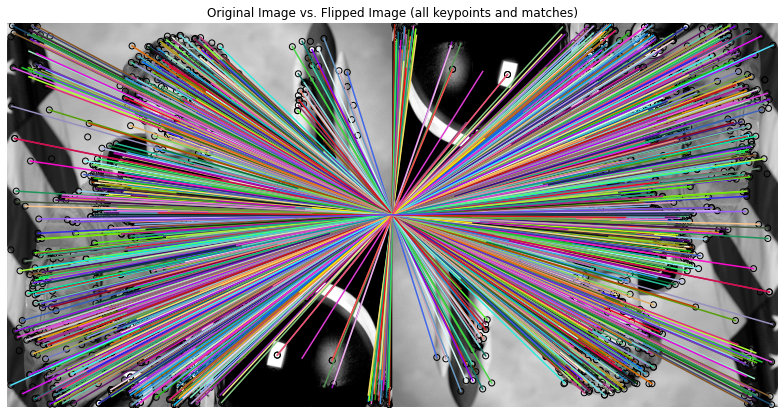

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
plt.gray()
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Flipped Image (all keypoints and matches)")
plt.tight_layout()
plt.show()

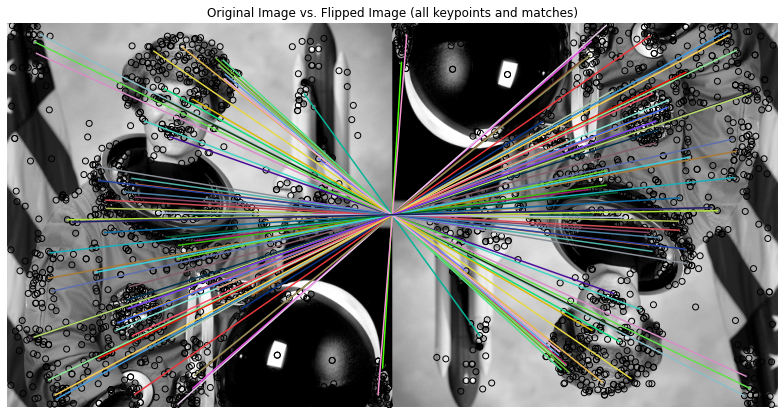

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
plt.gray()
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12[::15])
ax.axis('off')
ax.set_title("Original Image vs. Flipped Image (all keypoints and matches)")
plt.tight_layout()
plt.show()

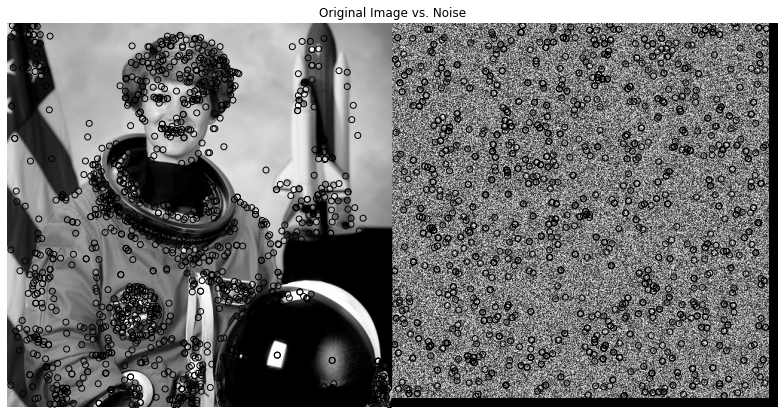

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
plt.gray()
plot_matches(ax, img1, img3, keypoints1, keypoints3, matches13[::15])
ax.axis('off')
ax.set_title("Original Image vs. Noise")
plt.tight_layout()
plt.show()